# Introduction


Organic chemistry has as one of its major goals the synthesis of molecules such as drugs or natural products, being thus a discipline of great importance in today's society. Nonetheless, the discipline may seem intimidating at first sight.

Among the hardest exercises that are given during organic chemistry lectures are those that require the synthesis of a target molecule from different reactants. The main difficulty of such an exercise is to identify the possible bond disconnections that may take place in the target molecule. Once several disconnections are spottet, the best one may be chosen.

However, for a student beginning the study of organic chemistry, being able to identify the possible disconnections may be hard and requires a lot of practice.

Keeping this in mind, our team came up with the following idea: a package that has functions which may identify possible bond disconnections in a molecule would be of great help to first/second year bachelor chemistry students. This idea was implemented in the package chemicalbd (chemical bonds disconnector). The package functions in the package allow to display the target molecule and the reactants from which it could be formed.

# Results and discussions

## First function

The module from which all the functions performing disconnections may be imported is called bond_disconnector.

The first function that was implemented in the project is C_S_disconnection. This function identifies the bond C(sp3)-S and disconnects it, giving the reactants from which such a bond may be formed: a thiol in the presence of potassium carbonate, and an alkyl halide. The two reactants give a classical SN2 reaction that produces the target molecule

In order to achieve this, it was first of all searched if the molecule contains the following SMARTS pattern: '[C^3][S]', which signifies an sp3 hybridized carbon linked to a sulphur atom. Than, the function ReactantsFromSmarts belonging to rdkit was employed. It basically identifies a pattern in a molecule (the SMARTS of the pattern is given to the function) and transforms it into another pattern (which also needs to be stated in the function ReactantsFromSmarts). Thus, a reverse reaction, **a disconnection**, is defined. This disconnection was applied to the target molecule and an iodine atom (which was needed in order to form one of the two reactants that could form the bond in the target molecule). This was done using the function RunReactants. The reactants needed were then returned and displayed.

The function takes in its input a Mol object (object speciffic to rdkit). The functionality of C_S disconnection is ilustrated in the cell below.

In [ ]:
from chemicalbd.bond_disconnector import C_S_disconnection
from rdkit import Chem
from IPython.display import display

mol_smiles = 'c1ccccc1SC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection(mol) #The function is performed.

The function displays in the beginning the reactants from which the bond can be formed: methyl iodide as reactants 1, and tiophenol in the presence of a weak base, potassium carbonate (the base is needed in order to deprotonate the tiophenol)

However, this is not all everything that the function returns. It also returns a list.

The first element of the list is 1. This represents that a C(sp3)-S was indeed found in the molecule. If this was not the case, a list containing only 0 would have been returned. The reason for which 1 or 0 is returned in a list is related to the last function, disconnections, and will be explained during the section of the report corresponding to that function. 

In the example below, it may be observed that only a list containing 0 is returned, as the molecule analyzed contains no C(sp3)-S bond.

In [12]:
mol_smiles = 'c1ccccc1OC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection(mol) #The function is performed.

[0]

Returning to the example where the C(sp3)-S bond was present, apart from 1, the list returned contained as a second element another list. That list contains 3 Mol objects, each corresponding to one of the molecules that are displayed.

In fact, the function did not return such a list in its first version. However, it was observed that if the function only displays the molecules but doesn't return something related to the molecules displayed, there is no reliable way to test that it indeed the good molecules are displayed. Therefore, the mol objects, corresponding to the displayed molecules, are also returned. During the tests corresponding to the case that the bond, or molecular pattern searched is present in the target molecule, the SMILES of the molecules expected to be displayed are searched in a list of SMILES strings corresponding to the returned molecules.

The function can also handle TypeErrors, in the case that the input is not a mol object. An example may be observed in the cell below.

In [10]:
mol_smiles = 'c1ccccc1SC'  #Defines to molecule to be analyzed, using its SMILES representation
mol = Chem.MolFromSmiles(mol_smiles) #The a Mol object is created from the SMILES representation
C_S_disconnection('molecule') #The function is performed.

TypeError:  Invalid type <class 'str'>: 'mol' Should be passed as a mol object.

The function can also handle more complicate cases. The following example is considered as the target molecule.

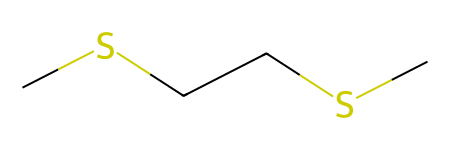

In [15]:
mol_smiles_complicated = 'CSCCSC' #Defines to molecule to be analyzed, using its SMILES representation
mol_complicated = Chem.MolFromSmiles(mol_smiles_complicated) #The a Mol object is created from the SMILES representation
display(mol_complicated) #The molecule is displayed

This molecule contains thiol functional groups. For each of the two groups, there are 2 C(sp3)-S bonds. Thus, there should be in principle 4 possible disconnections. But this is not the case, as in fact the molecule is symmetric. The 4 hypothetical disonnections could be formed grouped in 2 pairs, each pair containing two identical disonnections. Therefore, there are only 2 possible disonnections.

When using the rdkit functionality RunReactants for a defined reaction pattern, the expected molecules to be returned (which are usually products if a standard reaction is considered, but in this case they are reactants are reverse reactions, disconnections are considered) are returned as a nested tuple. Each tuple contains the reactants corresponding to a certain reaction site (an example of reaction site for this case would be the reaction site metyl-sulphur from the left of the molecule, or the methyl-sulphur from the right of the molecule) and these tuple are grouped in a tuples.

Thus, the tuple corresponding to the molecule in the example should contain 4 tuples. But as said before, one has only 2 different reactive sites. Therefore, 2 tuples need to be eliminated.

First of all, tuples are immutable, meaning that they can't be changed once created. The second problem is that rdkit associates unique Mol objects to the SMILES of molecules, even if the SMILES are identical and corresponding to the same molecule. In order to eliminate the tuples corresponding to identical molecules, the following strategy is employed: the nested tuple is transformed into a nested list of SMILES corresponding to each mol object. Then, the list is tranformed in order to only have unique elements (by transforming it into a list of tuples, then a set of tuples, and fianlly into a list of lists). Finally, the elements of each of the lists belonging to the parent list are converted back into Mol objects. This is done using the function **unique_list_reactants**.

With the help of this function, the correct reactants are displayed, as may be observed in the cell below. Also, it can be observed that the function was built such that the possible disconnections are showed consecutively, and correspond to only one bond disconnections

C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


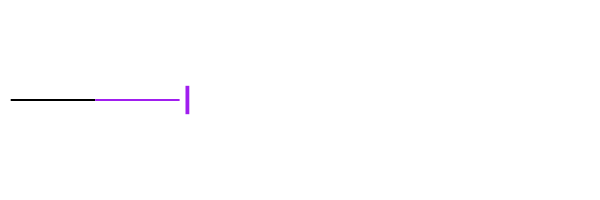

Reactant 2


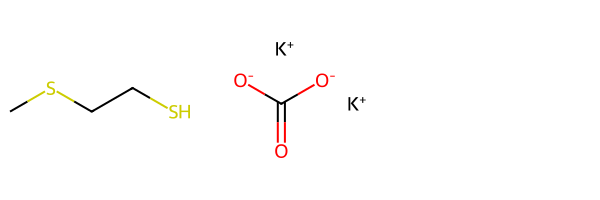

--------------------------------------
Option 2
Reactant 1


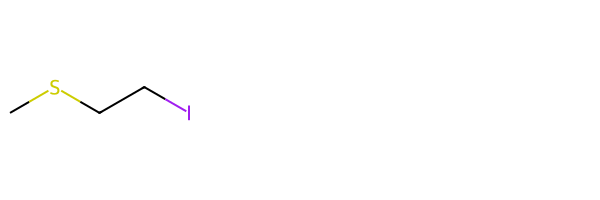

Reactant 2


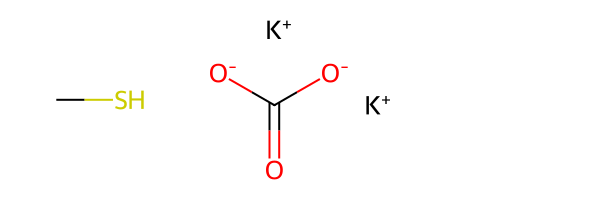

--------------------------------------
--------------------------------------


[1,

In [27]:
C_S_disconnection(mol_complicated) #The function is performed.

Finally, 3 tests are used for this function. In the first one, the C(sp3)-S bond is absent.

In [22]:
mol = Chem.MolFromSmiles('CCC') #Defines to molecule to be analyzed, using its SMILES representation and converts it to a Mol object
assert C_S_disconnection(mol) == [0] # The output value is tested

In the second one, the value input value is not of Mol type.

In [23]:
import pytest

mol = 'Ups'
with pytest.raises(TypeError):
    C_S_disconnection(mol)

In the last one, the input molecule contains the C(sp3)-S bond, and it is tested if the SMILES of the expected reactants are found in the list of the SMILES of the output molecules

C(sp3)-S disconection available
--------------------------------------
Option 1
Reactant 1


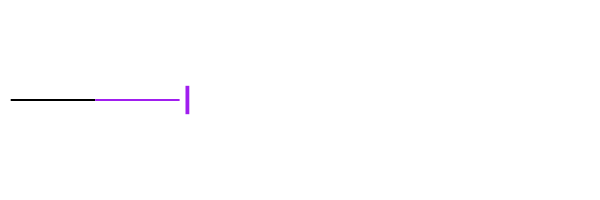

Reactant 2


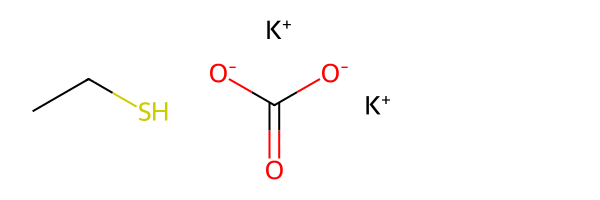

--------------------------------------
Option 2
Reactant 1


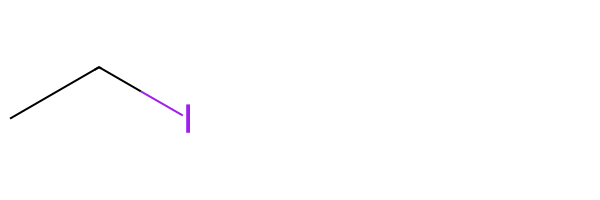

Reactant 2


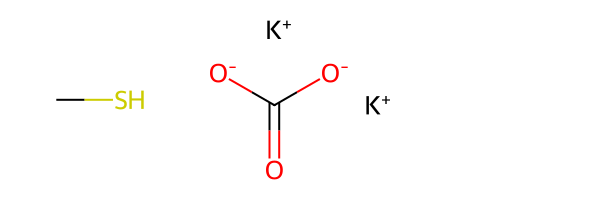

--------------------------------------
--------------------------------------


In [24]:
mol = Chem.MolFromSmiles('CSCC') #Defines to molecule to be analyzed, using its SMILES representation and converts it to a Mol object
reactant_list = C_S_disconnection(mol)[1]
smiles_list = [Chem.MolToSmiles(reactant) for reactant in reactant_list] #The list of reactants is transformed in a list corresponding to their SMILES
#It is checked if each smiles that should appear in the list of smiles indeed appears
assert Chem.MolToSmiles(Chem.MolFromSmiles('CI')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CCI')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CS')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('CCS')) in smiles_list
assert Chem.MolToSmiles(Chem.MolFromSmiles('C(=O)([O-])[O-].[K+].[K+]')) in smiles_list

As no error was signaled, all the tests were sucessful.

Using the principle used described in this part, functions for other chemical bonds or patterns were created in the same way. The function **unique_list_reactants** was always of great importance, as it permitted returning unique reactants. Each reactive site is treated separately, implying disconnection of only one reactive site at a time. Thus, the disconnection of each reactive site is presented as a different option. Also, in order to test the functions, the same 3 scenarios were evaluated using the same logic as for the tests of the C_S_disconnection

## Functions corresponding to different molecular patterns

The functions created correspond to functional groups or molecular patterns that are very frequently encountered in organic molecules, such as carboxylic acid derrivatives, ethers, amines, double bonds, aldehydes, alcohols, alcohols that contain a beta double or triple bond, alkylated carbonyl compounds.

### Function for disconnecting esters

The function that disconnects esters is called ester_disconnection, and gives as reactants a carboxylic acid and an alcohol. A strong acid, denoted as a proton is also displayed. The carboxylic acid and the alcohol react in the presence of the catalyst in order to give the ester, according to the Fischer esterification reaction. This functionality is presented in the cell below.

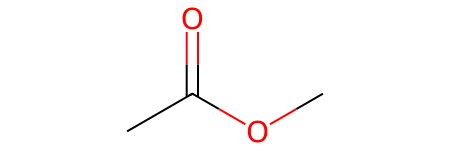

In [28]:
ester_smiles = 'CC(=O)OC' #Defines to molecule to be analyzed, using its SMILES representation
ester = Chem.MolFromSmiles(ester_smiles) #The Mol object is created from the SMILES representation
display(ester) #The ester, methyl acetate is displayed

Ester disconnection available
--------------------------------------
Option 1
Reactant 1


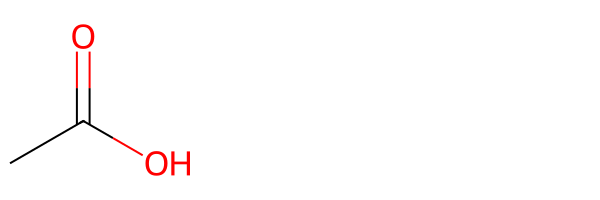

Reactant 2


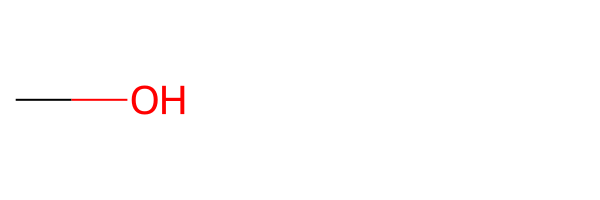

Catalyst


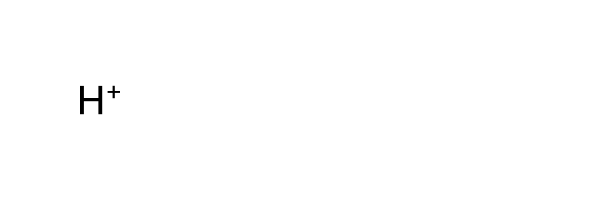

--------------------------------------
--------------------------------------


[1,

In [29]:
from chemicalbd.bond_disconnector import ester_disconnection
ester_disconnection(ester) #The function corresponding to the ester disconnection is run

The expected reactants: acetic acid and methanol, with a strong acid as a catalyst are displayed. Also, a list containing as a first element 1 (signifying that an ester disconnection was found) and a list of Mol objects (corresponding to the displayed molecules) is returned.

### Function for disconnecting aldehydes

The function that disconnects aldehydes is called swern_oxidation. The name comes from the name reaction that is used to generate the aldehyde from the oxidation of a primary alcohol. This method was chosen as the Swern Oxidation is a reaction that offers a good chemoselectivity, oxidizing selectively primary alcohols to the corresponding aldehyde.

The functionality can be demonstrated by taking the example of succinaldehyde, which is displayed below.

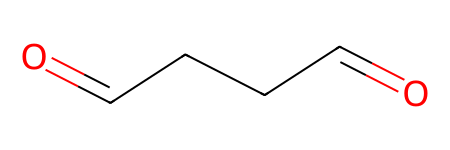

In [32]:
aldehyde_smiles = 'O=CCCC=O' #Defines to molecule to be analyzed, using its SMILES representation
aldehyde = Chem.MolFromSmiles(aldehyde_smiles) #The Mol object is created from the SMILES representation
display(aldehyde) #The dialdehyde, succinaldehyde, is displayed

Aldehyde disconnection spotted
--------------------------------------
Option 1
Reactants


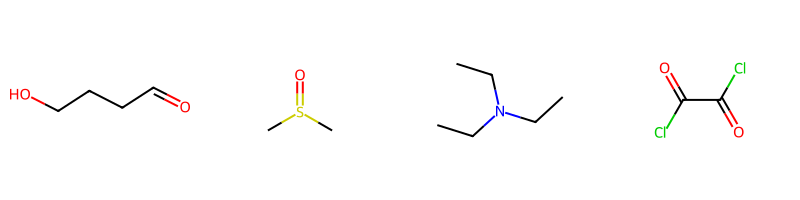

--------------------------------------
--------------------------------------


[1,

In [39]:
from chemicalbd.bond_disconnector import swern_oxidation
swern_oxidation (aldehyde) #The function disconnecting the aldehyde is run

As expected, only one option is returned as the molecule is symmetric. The reactants displayed are the corresponding primary alcohol, dimethylsulfoxide (DMSO), triethylamine (Et3N) and oxalyl chloride.

### Function that disconnects alcohols containing triple bonds in their beta position

Molecules that contain the pattern: alcohol together with a triple bond in the beta position may be disconnected giving the following reactants: an epoxide, and a terminal alkyne in the presence of a moderately strong base, such as sodium amide. The reactants give a classical SN2 reaction that form the target molecule.

This functionality may be shown by taking as an example the molecule displayed below.

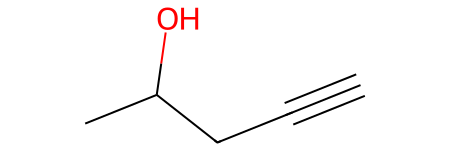

In [40]:
example_smiles = 'OC(C)CC#C' #Defines to molecule to be analyzed, using its SMILES representation
example = Chem.MolFromSmiles(example_smiles) #The Mol object is created from the SMILES representation
display(example) #The compound containing the alcohol and the triple bond in the beta position is displayed

Primary alcohol with beta alkyne disconnection available
--------------------------------------
Option 1
Reactant 1


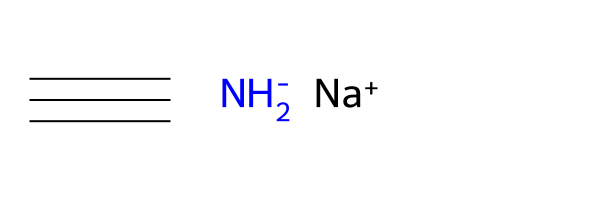

Reactant 2


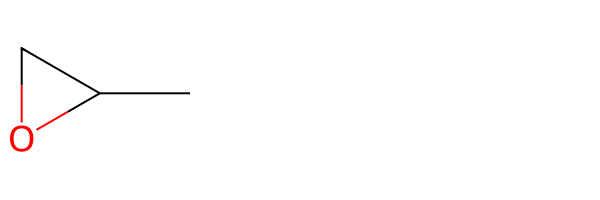

--------------------------------------
--------------------------------------


[1,

In [44]:
from chemicalbd.bond_disconnector import alcohol_beta_triple_bond
alcohol_beta_triple_bond (example) #The function disconnecting the pattern is run

The expected reactants are returned: acetylene in the presence of the amide and a methyl substituted epoxide

Another example may be analyzed, the one in which also the alpha carbon with respect to the triple bond is subtituted.

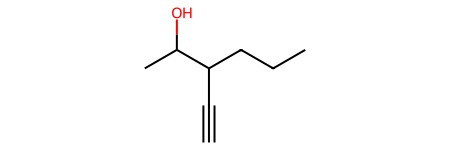

In [43]:
example_smiles_new = 'OC(C)C(CCC)C#C' #Defines to molecule to be analyzed, using its SMILES representation
example_new = Chem.MolFromSmiles(example_smiles_new) #The Mol object is created from the SMILES representation
display(example_new) #The compound containing the alcohol and the triple bond in the beta position is displayed

In [45]:
alcohol_beta_triple_bond (example_new) #The function disconnecting the pattern is run

[0]

This result may seem surprising, as the pattern is contained in the molecule. However, the reaction used to make such compounds is effective and chemoselective if none of the two carbon atoms between the triple bond, or maximum the one next to the hydroxyl is subsituted. This is because the terminal deprotonated alkyne will open the epoxide preferrentially on the less subtituted side.

In order to synthetize the molecule shown in the above example, the epoxide displayed below would be needed.

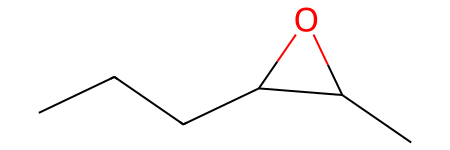

In [47]:
epoxide_needed = Chem.MolFromSmiles('CCCC1C(C)O1') #Creates a mol object from the SMILES of the epoxide
display(epoxide_needed) #The epoxide is displayed

As it may be observed, this epoxide is substituted on both sides, and therefore the reaction with the alkyne is not chemoselective.

The pattern given that was given in the function to be searched is '[C]#[C][CH2][C^3][OH]'. It was thus specifically stated that the carbon next to the triple bond needs to be non-substituted, so that the reaction given by the displayed molecules is chemoselective. 

This is why, in the previous example, the function did not return any reactant.

### Function that disconnects alcohols containing double bonds in their beta position

This function is very similar to the one containing triple bonds instead of double bonds. This is because the first step of the synthesis is the same as before. Nonetheless, what was before a target molecule is now just a synthesis intermediate, which needs to be hydrogenated in order to obtain the target moleucule. This is thus the first function that displays and returns not only the reactants needed, but also a synthesis intermediate.

Afterwards, the hydrogenation conditions are also displayed and returned. Two possibilities are given, depending on weather the (Z) or (E) isomer of the double bond is desired.

This functionality may be shown by taking as an example the molecule displayed below.

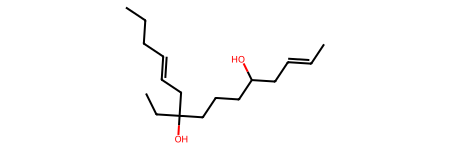

In [49]:
example_alcohol_db_smiles = 'CC=CCC(O)CCCC(O)(CC)CC=CCCC' #Defines to molecule to be analyzed, using its SMILES representation
alcohol_db = Chem.MolFromSmiles(example_alcohol_db_smiles) #The Mol object is created from the SMILES representation
display(alcohol_db) #The compound containing the alcohol and the double bond in the beta position is displayed

Primary alcohol with beta alkene disconnection available
--------------------------------------
Option 1
Reactant 1


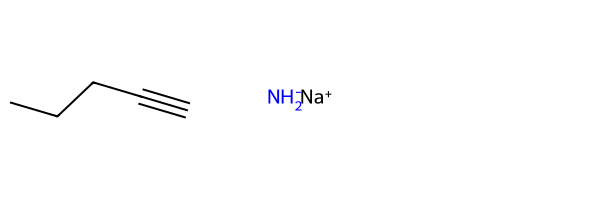

Reactant 2


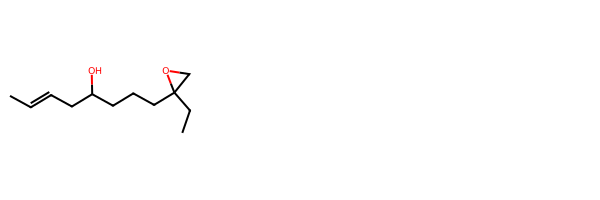

Once this two are combined, the following product is obtained


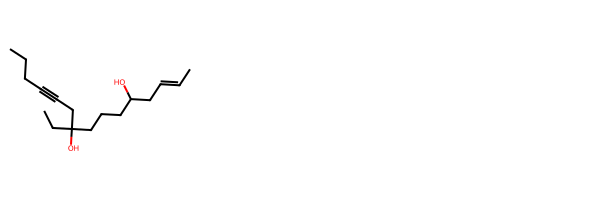

The product needs to be hydrogenated in order to get to the target molecule
If the Z geometry is needed for the double bond, then the following conditions, known as hydrogen on Lindlar catalyst, are employed


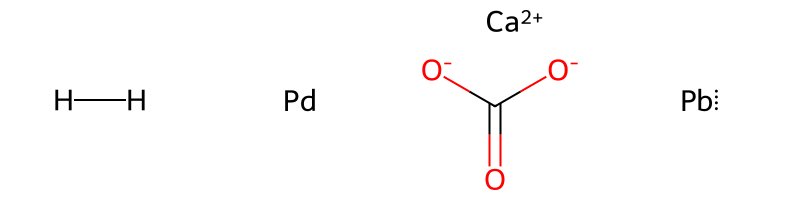

If the E geometry is needed for the double bond, then the following conditions are employed


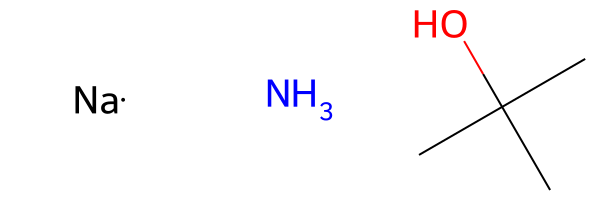

--------------------------------------
Option 2
Reactant 1


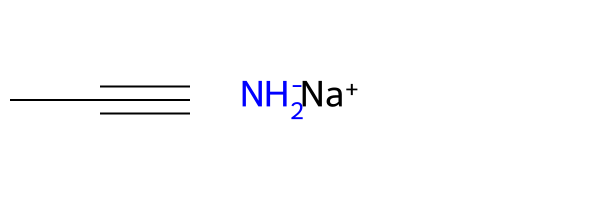

Reactant 2


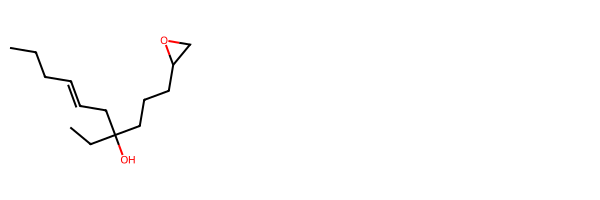

Once this two are combined, the following product is obtained


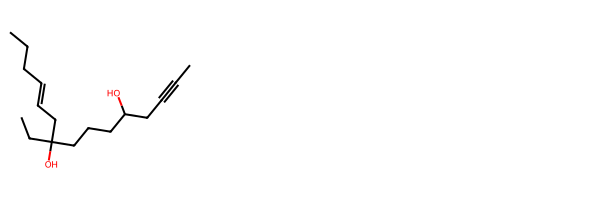

The product needs to be hydrogenated in order to get to the target molecule
If the Z geometry is needed for the double bond, then the following conditions, known as hydrogen on Lindlar catalyst, are employed


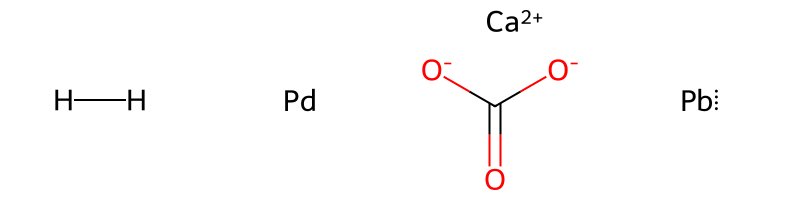

If the E geometry is needed for the double bond, then the following conditions are employed


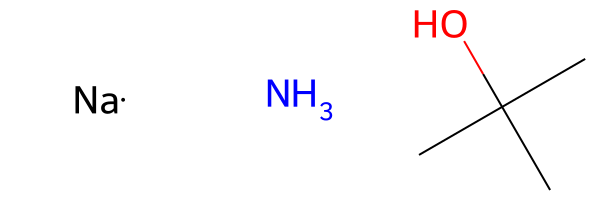

--------------------------------------
--------------------------------------


[1,

In [51]:
from chemicalbd.bond_disconnector import alcohol_beta_double_bond
alcohol_beta_double_bond(alcohol_db) #The function disconnecting the pattern is run

The reactants expected, the intermediates and the hydrogenation conditions are returned, for each of the two reactive sites.

One peculiar thing is related to the 3 unpaired electrons when the lead atom is displayed. This is due to the display settings of rdkit.